In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Kaggle\train.csv')
df

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


<Figure size 1000x1000 with 0 Axes>

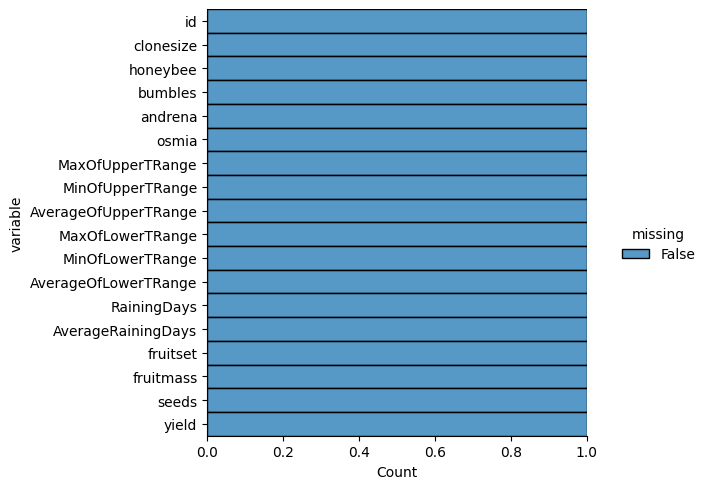

In [4]:
plt.figure(figsize=(10, 10))
sns.displot(data=df.isna().melt(value_name='missing'),
             y='variable', hue='missing', multiple='fill', aspect=1.25)


In [6]:
df.corr()['yield']

id                      0.000975
clonesize              -0.382619
honeybee               -0.118001
bumbles                 0.161145
andrena                 0.073969
osmia                   0.198264
MaxOfUpperTRange       -0.022517
MinOfUpperTRange       -0.021929
AverageOfUpperTRange   -0.021940
MaxOfLowerTRange       -0.022197
MinOfLowerTRange       -0.022319
AverageOfLowerTRange   -0.022081
RainingDays            -0.477191
AverageRainingDays     -0.483870
fruitset                0.885967
fruitmass               0.826481
seeds                   0.868853
yield                   1.000000
Name: yield, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split,ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
KNeighbors = {'name':'KNeighborsClassifier',
             'estimator':KNeighborsClassifier(),
             'hyperparameters': {
                 'n_neighbors':range(1,20,2),
                 'weights':['distance','uniform'],
                 'algorithm':['ball_tree','kd_tree','brute'],
                 'p':[1,2]}
             }
Logistic = {'name':'LogisticRegression',
            'estimator':LogisticRegression(max_iter=10000),
            'hyperparameters':{
                'solver': ["newton-cg", "lbfgs", "liblinear"]}
           }
RandomForest = {'name':'RandomForest',
                'estimator':RandomForestClassifier(),
                'hyperparameters':{
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]}
               }

model_list = [KNeighbors,Logistic,RandomForest]

features = df.drop('yield',axis=1).columns


In [ ]:
def model_selection(model_list,df,features,target):

    # Split data in train/test
    train, test = train_test_split(features,target, test_size=0.3)
    
    # Hyperparameter optimization. Here, the model list will be iterated through
    # and each of the parameters in "hyperparameters" will be tested with the help of ParameterGrid()
    best_params_dict = {}
    for model in model_list:
        parameters = model['hyperparameters']
        best_score = 0
        for params in ParameterGrid(parameters):
            estimator = model['estimator'].set_params(**params)
            estimator.fit(train[features],train['Target'])
            predictions = estimator.predict(test[features])
            accuracy = accuracy_score(predictions,test['Target'])
            if accuracy > best_score:
                best_score = accuracy
                best_params_dict[model['name']] = {'Best Score': best_score,'Best parameters': params}
    return best_params_dict